# Decision Tree Algorithm

A Supervised machine learning algorithm used for classification.

# How does it work?

**Step 1: Convert dataset to categorical format.**
Example: 
![Dataset](./images/dataset.png)

**Step 2: Calculate entropy for each attribute.**
![Entropy](./images/entropy.png)

Where Pi is the Probability that a Tuple D belongs to class Ci

So in our dataset entropy of our class variable would be:
![](./images/entropy_example.png)

and entropy of the age attribute would be:
![](./images/entropy_attr_example.jpg)
    

Step 3: Calculate Information Gain for each attribute.
![Information Gain](./images/info_gain.png)


Information gain of Age attribute would be:
    ![age_attr_gain](./images/info_gain_age_attr.png)
    
Similarly, Gain(income) = 0.029, Gain(Student) = 0.151 and Gain(credit_rating) = 0.048

Step 4: Attribute with the highest information gain becomes the splitting point.

In our case this is the age attribute:
![splitting](./images/split_example.png)

Step 5: Continue doing this until all attributes are considered. :) 

### Decision Tree in Python

In [1]:
"""
Taken from : https://acadgild.com/blog/decision-tree-python-code
"""
import os
import numpy as np
import pandas as pd
from sklearn import tree, metrics, model_selection
import graphviz

In [3]:
data =pd.read_csv("./datasets/car.data", names=['buying','maint','doors','persons','lug_boot','safety','class'])
data.head(3) 

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
class_names = data['class'].unique()
print("Class names are: ", class_names)
data['class'], _ = pd.factorize(data['class'])
print("Unique values: ", data['class'].unique())
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()

Class names are:  ['unacc' 'acc' 'vgood' 'good']
Unique values:  [0 1 2 3]


,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [7]:
# for understanding iloc: https://www.sharpsightlabs.com/blog/pandas-iloc/
predictors = data.iloc[:,:-1]
target_var = data.iloc[:, -1]
print(predictors)
print(target_var)

      buying  maint  doors  persons  lug_boot  safety
0          0      0      0        0         0       0
1          0      0      0        0         0       1
2          0      0      0        0         0       2
3          0      0      0        0         1       0
4          0      0      0        0         1       1
...      ...    ...    ...      ...       ...     ...
1723       3      3      3        2         1       1
1724       3      3      3        2         1       2
1725       3      3      3        2         2       0
1726       3      3      3        2         2       1
1727       3      3      3        2         2       2

[1728 rows x 6 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1723    3
1724    2
1725    0
1726    3
1727    2
Name: class, Length: 1728, dtype: int64


In [8]:
predictor_train, predictor_test, target_train, target_test = model_selection.train_test_split(predictors, target_var, test_size=0.3, random_state=0)

In [9]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(predictor_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [10]:
target_pred = dtree.predict(predictor_test)

count_misclassified = (target_test != target_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(target_test, target_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 96
Accuracy: 0.82


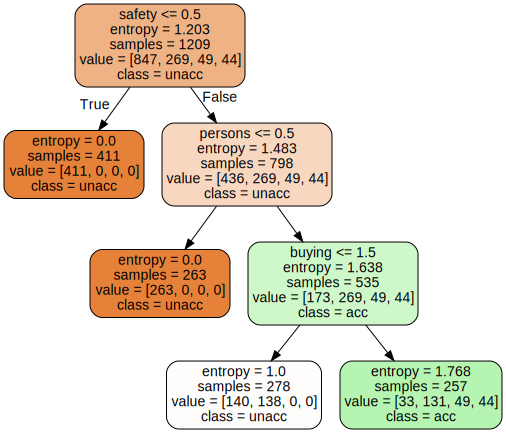

In [11]:
feature_names = predictors.columns

dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(dot_data)  
graph